In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import random
import matplotlib.pyplot as plt

## Gambler's Ruin as described in the book

In the game, a gambler puts money on stake till he is bankrupt, or wins has $100. The state space is {1,2,..., 99} and to each state, the action space is {0,1,...,min(s,100-s)}



# Gambler's Ruin

In this file, I create a Reinforced Learning algorithm that finds the best policy for playing the Gambler's Ruin simulation game. 

At the end, I create a Gambler's Ruin Simulation game, and show that the learned policy performs well. 

In [3]:
win_prob = 0.4
threshold = 0.001

old_value = [0 for i in range(101)]
old_value[0] = 0
old_value[100] = 0

def reward(s):
    if s == 100:
        return 1
    else:
        return 0

new_value = [0 for i in range(101)]
for sweeps in range(100):
    for s in range(1,100):
        new_value[s] = max([win_prob*(old_value[s+a]+reward(s+a)) + 
                        (1-win_prob)*(old_value[s-a] + reward(s-a)) 
                        for a in range(1,min(s,100-s)+1)])       
    old_value = new_value
    


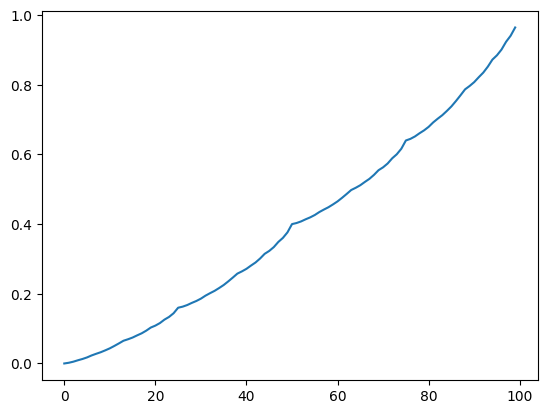

In [4]:
fig, ax = plt.subplots()
ax.plot(new_value[0:100]);

In [5]:
policy = [0 for i in range(99)]
for i in range(99):
    s = i+1
    policy[i] = np.argmax([win_prob*(new_value[s+a]+reward(s+a)) + 
                        (1-win_prob)*(new_value[s-a] + reward(s-a))
                           for a in range(1,min(s, 100-s)+1)])+1


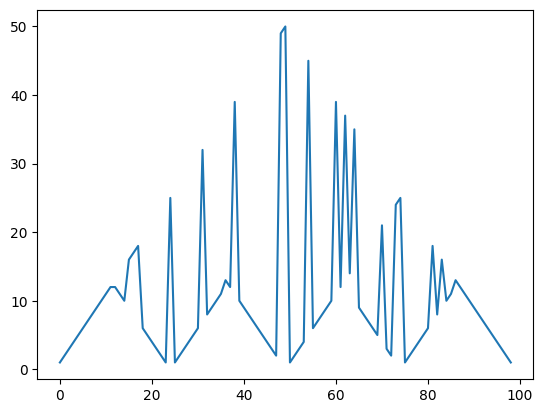

In [6]:
fig, ax = plt.subplots()
ax.plot(policy);

In [7]:
class Gambler_simulation:
    def __init__(self, initial_money, win_prob):
        self.initial_money = initial_money
        self.win_prob = win_prob
        self.game_state = True
    def bet(self, a):
        outcome =  random.choices([self.initial_money+a, self.initial_money-a],
                              [self.win_prob, 1-self.win_prob])[0]
        self.initial_money = outcome
        if outcome <=0:
            self.game_state = False
            return 0
        return outcome





# Performance of Learned Policy

In [8]:
win_percentage_learned_policy = [0 for i in range(99)]
for i in range(99):
    wins_and_losses = [0,0]
    for j in range(10000):
        env = Gambler_simulation(i+1, win_prob)
        while env.game_state and env.initial_money <100:
            state = env.initial_money
            bet_amount = policy[state-1]
            env.bet(bet_amount)
        if env.game_state:
            wins_and_losses[0]+=1
        else:
            wins_and_losses[1]+=1
    win_percentage_learned_policy[i] = wins_and_losses[0]
    

# Performance of all in

Bets all the money in the first round

In [9]:
win_percentage_all_in = [0 for i in range(99)]
for i in range(99):
    wins_and_losses = [0,0]
    for j in range(10000):
        env = Gambler_simulation(i+1, win_prob)
        while env.game_state and env.initial_money <100:
            state = env.initial_money
            bet_amount = min([state, 100-state])
            env.bet(bet_amount)
        if env.game_state:
            wins_and_losses[0]+=1
        else:
            wins_and_losses[1]+=1
    
    win_percentage_all_in[i] = wins_and_losses[0]

# How often Learned Policy better? 

In [10]:
win = 0
for i in range(99):
    if win_percentage_all_in[i]<=win_percentage_learned_policy[i]:
        win+=1
print(win)

53


# Graphic Comparison of all in and learned policy

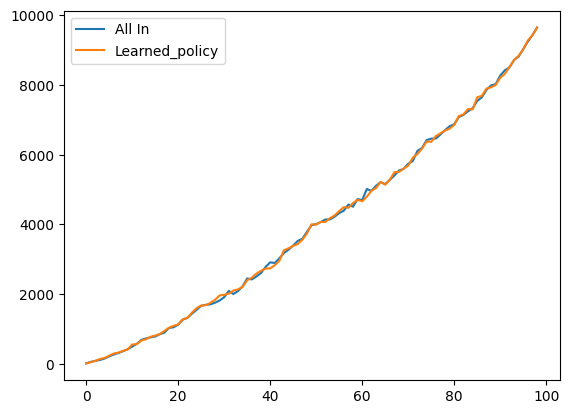

In [11]:
fig, ax = plt.subplots()
ax.plot(win_percentage_all_in, label = 'All In')
ax.plot(win_percentage_learned_policy, label = 'Learned_policy')
ax.legend();

# Performance of very Cautious player

Only bets 1 dollar each time

In [12]:
# win_percentage_cautious = [0 for i in range(99)]
# for i in range(99):
#     wins_and_losses = [0,0]
#     for j in range(10000):
#         env = Gambler_simulation(i+1, win_prob)
#         while env.game_state and env.initial_money <100:
#             state = env.initial_money
#             bet_amount = 1
#             env.bet(bet_amount)
#         if env.game_state:
#             wins_and_losses[0]+=1
#         else:
#             wins_and_losses[1]+=1
    
#     win_percentage_cautious[i] = wins_and_losses[0]

In [13]:
# fig.ax = plt.subplots()
# #ax.plot(win_percentage_learned_policy, label = 'Learned Policy')
# ax.plot(win_percentage_all_in, label = 'All In')
# #ax.plot(win_percentage_cautious, label = 'Cautious')
